# 03.02 - SUPERVISED ALGORITHMS

In [88]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [89]:
from sklearn.datasets import *
import numpy as np
from local.lib import mlutils
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

DATOS DEL PROYECTO

In [ ]:
!rm -rf Proyecto-I.A
!git clone https://github.com/doviedob/Proyecto-I.A.git


Cloning into 'Proyecto-I.A'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 35 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), 3.22 MiB | 4.93 MiB/s, done.


In [ ]:
import pandas as pd
d = pd.read_csv('Proyecto-I.A/train_recortado_con_faltantes.csv')

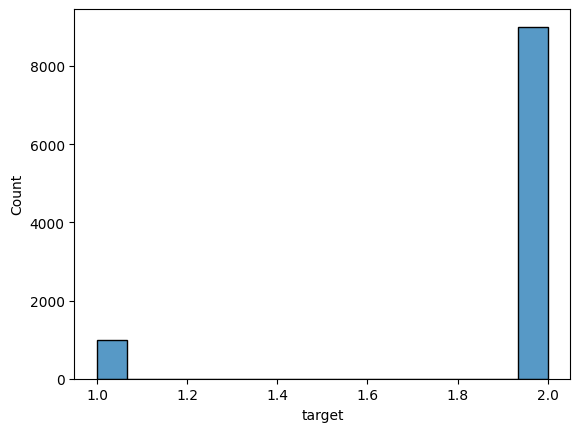

In [ ]:
import seaborn as sns
sns.histplot(d['target']);

In [ ]:
#Reemplazar 2 por 0 en target
d["target"]=d["target"].replace(2,0)

In [ ]:
## Identificar las columnas con valores NaN
columns_with_nan = d.columns[d.isnull().any()].tolist()
dC=d.copy()
# Iterar sobre las columnas con valores NaN
for column in columns_with_nan:

    k = dC[column].copy()
    k[k.isna()] = np.random.normal(loc=np.mean(k), scale=np.std(k), size=np.sum(k.isna()))
    dC[column] = k

In [ ]:
dC['var_11']

0       -9.059858
1        8.058500
2       -5.567692
3        2.229002
4       -0.650638
          ...    
9995    -6.660152
9996   -12.137367
9997   -10.157722
9998    -0.591906
9999    -3.783358
Name: var_11, Length: 10000, dtype: float64

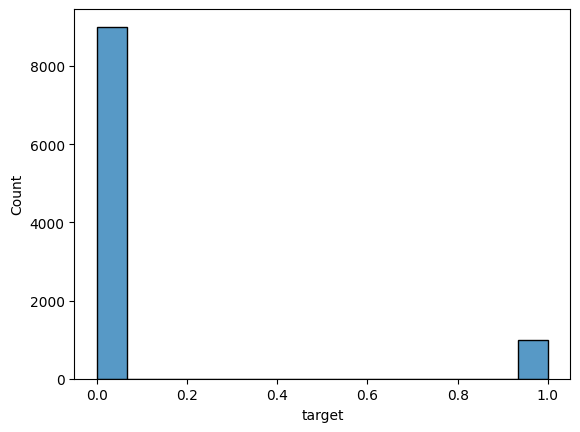

In [ ]:
import seaborn as sns
sns.histplot(dC['target']);

Se extraen los datos de entrenamiento :
X1 son los dats de los predictores
y es la salida real

In [ ]:
X=dC.iloc[:,2:]# Datos de variables estimadores
X=X.values
X.shape 
y=dC.iloc[:,1] #Salida es variable objetivo
y=y.values

In [ ]:
dC

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47
0,train_0,0,8.9255,4,11.9081,5.0930,10.756638,-9.2834,5.1187,18.6266,...,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136
1,train_1,0,11.5006,2,13.8588,5.3890,13.961551,7.0433,5.6208,16.5338,...,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948
2,train_2,0,8.6093,1,12.0805,7.8928,9.735233,-9.0837,6.9427,14.6155,...,10.8917,0.9003,-13.5174,2.2439,11.5283,12.0406,4.1006,-7.9078,11.1405,-5.7864
3,train_3,0,11.0604,1,8.9522,7.1957,13.580710,-1.8361,5.8428,14.9250,...,9.1738,0.6665,-3.8294,-1.0370,11.7770,11.2834,8.0485,-24.6840,12.7404,-35.1659
4,train_4,0,9.8369,1,12.8746,6.6375,11.495781,2.4486,5.9405,19.2514,...,19.3038,1.4450,-5.5963,14.0685,11.9171,11.5111,6.9087,-65.4863,13.8657,0.0444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,train_9995,0,16.0253,1,13.0579,9.4553,12.768310,-7.6494,4.6907,13.4384,...,14.6451,1.4674,-11.6031,15.2182,10.2305,11.9210,11.5094,-38.8107,11.4250,-22.3405
9996,train_9996,0,8.2377,0,11.4494,7.4673,13.646325,-10.3440,6.0994,16.4344,...,18.1710,1.7573,-0.4990,16.7279,10.3478,11.6335,13.6676,-11.7504,8.4610,-26.1303
9997,train_9997,0,7.4000,1,5.4020,7.7881,11.626045,2.3572,5.4715,18.1689,...,9.0020,3.6365,11.8644,4.3097,12.4221,11.8942,0.5918,-51.3237,11.6610,-13.3436
9998,train_9998,0,7.7726,2,8.6391,6.4502,10.069415,-10.2559,6.4168,10.9147,...,12.1261,-0.9865,-19.2551,14.1623,11.9435,11.7020,5.1407,7.8424,9.7124,-33.2030


In [ ]:
# Guardar el conjunto de datos modificado en un nuevo archivo CSV
dC.to_csv('train_listo.csv', index=False)

Se extraen los datos de validación:
XV son los datos de los predictores
yV es la salida real

In [90]:
!rm -rf Proyecto-I.A
!git clone https://github.com/doviedob/Proyecto-I.A.git

dV = pd.read_csv('Proyecto-I.A/test_recortado.csv')

XV=dV.iloc[:,2:]# Datos de variables estimadores
XV=XV.values
print(XV.shape) 
yV=dC.iloc[:,1] #Salida es variable objetivo
yV=yV.values
print(yV.shape)

Cloning into 'Proyecto-I.A'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 39 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (39/39), 5.18 MiB | 3.31 MiB/s, done.
(10000, 48)
(10000,)


In [ ]:
dC

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47
0,train_0,0,8.9255,4,11.9081,5.0930,10.153767,-9.2834,5.1187,18.6266,...,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136
1,train_1,0,11.5006,2,13.8588,5.3890,11.319150,7.0433,5.6208,16.5338,...,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948
2,train_2,0,8.6093,1,12.0805,7.8928,10.868915,-9.0837,6.9427,14.6155,...,10.8917,0.9003,-13.5174,2.2439,11.5283,12.0406,4.1006,-7.9078,11.1405,-5.7864
3,train_3,0,11.0604,1,8.9522,7.1957,9.701845,-1.8361,5.8428,14.9250,...,9.1738,0.6665,-3.8294,-1.0370,11.7770,11.2834,8.0485,-24.6840,12.7404,-35.1659
4,train_4,0,9.8369,1,12.8746,6.6375,12.662543,2.4486,5.9405,19.2514,...,19.3038,1.4450,-5.5963,14.0685,11.9171,11.5111,6.9087,-65.4863,13.8657,0.0444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,train_9995,0,16.0253,1,13.0579,9.4553,10.794598,-7.6494,4.6907,13.4384,...,14.6451,1.4674,-11.6031,15.2182,10.2305,11.9210,11.5094,-38.8107,11.4250,-22.3405
9996,train_9996,0,8.2377,0,11.4494,7.4673,10.559746,-10.3440,6.0994,16.4344,...,18.1710,1.7573,-0.4990,16.7279,10.3478,11.6335,13.6676,-11.7504,8.4610,-26.1303
9997,train_9997,0,7.4000,1,5.4020,7.7881,12.815547,2.3572,5.4715,18.1689,...,9.0020,3.6365,11.8644,4.3097,12.4221,11.8942,0.5918,-51.3237,11.6610,-13.3436
9998,train_9998,0,7.7726,2,8.6391,6.4502,13.357882,-10.2559,6.4168,10.9147,...,12.1261,-0.9865,-19.2551,14.1623,11.9435,11.7020,5.1407,7.8424,9.7124,-33.2030


In [91]:
dV

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,0.8804,-19.0841,5.2272,9.5977,12.1801,8.3565,15.1170,10.0921,-20.8504,8.6758
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,8.8336,-4.8327,0.9554,12.3754,11.4241,6.6917,-12.9761,13.7343,5.0150,31.3923
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,0.3695,-14.4364,5.1392,11.6336,12.0338,18.9670,12.0144,16.2096,-2.1966,1.1174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,test_9995,11.9068,-1.2644,15.7963,10.8511,8.6547,-14.8807,4.6185,18.6862,-6.5265,...,2.2099,0.9843,14.2025,11.1603,12.0650,7.4906,-11.9669,8.8888,-16.1819,2.4687
9996,test_9996,11.0274,1.9560,12.7356,8.4869,9.7384,-4.2716,4.7961,11.9392,4.6359,...,-2.5394,6.1759,8.2097,11.4215,11.3434,19.8682,35.2301,8.7064,-14.6902,5.6473
9997,test_9997,7.4362,3.5957,8.6798,8.0995,9.9780,1.1709,5.7513,19.6504,-3.5690,...,9.0085,9.6782,14.1232,11.0388,11.6014,13.0294,-10.9808,12.6405,-17.8634,31.1637
9998,test_9998,9.6954,-1.4932,16.2631,3.1120,10.8874,8.6960,6.0662,12.6772,2.6279,...,0.2947,-11.0473,12.7977,10.5573,11.8261,2.5963,-8.6526,10.9847,-5.8557,10.4102


In [ ]:
# Guardar el conjunto de datos modificado en un nuevo archivo CSV
dV.to_csv('test_recortado.csv', index=False)

## SUPERVISED ALGORITHMS

- We are given $X$ and $y$


In [ ]:
#Del proyecto
X.shape, y.shape

((10000, 48), (10000,))

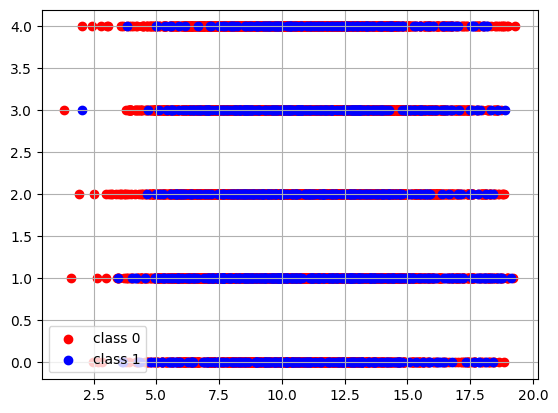

In [ ]:
## KEEPOUTPUT
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red", label="class 0")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue", label="class 1")
plt.legend();
plt.grid();

## Clasificador Lineal

In [ ]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # Esta linea crea la plantilla del modelo 

#Para datos de entrenamiento 
lr.fit(X,y) #Se entrena el algoritmo
Acc_T=lr.score(X,y) #Porcentaje de acierto

#Para datos de entrenamiento 
lr.fit(XV,yV) #Se evalua el algoritmo con los datos de validación
Acc_V=lr.score(XV,yV) #Porcentaje de acierto

print("Accurracy entrenamiento: ",Acc_T)
print("Accurracy validación: ",Acc_V)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accurracy entrenamiento:  0.9011
Accurracy validación:  0.9006


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
preds=lr.predict(X) # Se halla la salida predicha 
preds[:20] #Primeras 20 muestras de la salida predicha con el modelo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
y[:20] #Primeras 20 muestras de la salida real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

## Arboles de decision

Arbol de decisión 1 con profundidad 2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


     Métrica  Entrenamiento  Validación
0   Accuracy         0.9006     0.90110
1  Precision         0.0000     1.00000
2     Recall         0.0000     0.00503
3   F1 Score         0.0000     0.01001
[[9006    0]
 [ 994    0]]


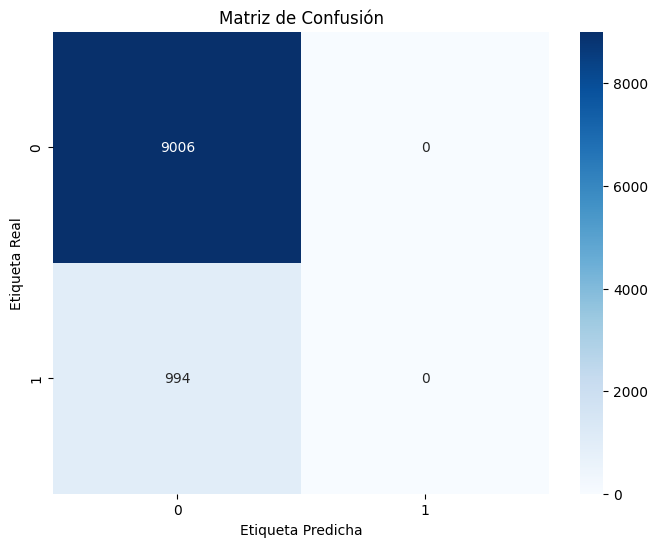

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#Se crea mo0delo con arboles de decisión
dt = DecisionTreeClassifier(max_depth=2)

# Entrenar el modelo con los datos de entrenamiento
dt.fit(X, y)

# Predecir las etiquetas de los datos de entrenamiento
y_preds_train = dt.predict(X)

# Calcular el accuracy con los datos de entrenamiento
accuracy_train = accuracy_score(y, y_preds_train)

# Calcular la precision con los datos de entrenamiento
precision_train = precision_score(y, y_preds_train)

# Calcular el recall con los datos de entrenamiento
recall_train = recall_score(y, y_preds_train)

# Calcular el F1 score con los datos de entrenamiento
f1_train = f1_score(y, y_preds_train)

# Calcular la matriz de confusión con los datos de entrenamiento
confusion_mat_train = confusion_matrix(y, y_preds_train)

# Entrenar el modelo con los datos de validación
dt.fit(XV, yV)

# Predecir las etiquetas de los datos de validación
y_preds_val = dt.predict(XV)

# Calcular el accuracy con los datos de validación
accuracy_val = accuracy_score(yV, y_preds_val)

# Calcular la precision con los datos de validación
precision_val = precision_score(yV, y_preds_val)

# Calcular el recall con los datos de validación
recall_val = recall_score(yV, y_preds_val)

# Calcular el F1 score con los datos de validación
f1_val = f1_score(yV, y_preds_val)

# Calcular la matriz de confusión con los datos de validación
confusion_mat_val = confusion_matrix(yV, y_preds_val)

# Crear un DataFrame con las métricas
data = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Entrenamiento': [accuracy_train, precision_train, recall_train, f1_train],
    'Validación': [accuracy_val, precision_val, recall_val, f1_val]
}
metrics_df = pd.DataFrame(data)

# Mostrar el DataFrame
print(metrics_df)
print(confusion_mat_train)

# Crear una función para trazar la matriz de confusión
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.show()

# Trazar la matriz de confusión
plot_confusion_matrix(confusion_mat_train)





Arbol de decisición 2 con profundidad 10

     Métrica  Entrenamiento  Validación
0   Accuracy       0.932300    0.909100
1  Precision       0.949008    0.988506
2     Recall       0.337022    0.086519
3   F1 Score       0.497402    0.159112
[[8988   18]
 [ 659  335]]


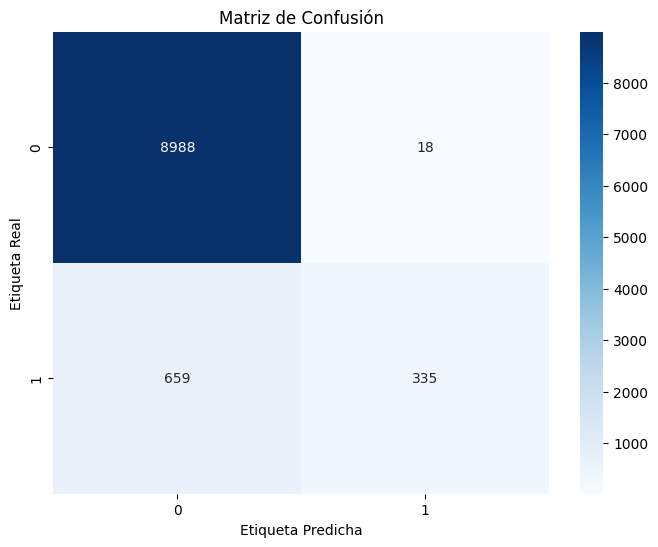

In [92]:
#Se crea modelo con arboles de decisión
dt = DecisionTreeClassifier(max_depth=10)

#Con datos de entrenamiento
dt.fit(X,y)
# Predecir las etiquetas de los datos de entrenamiento
y_preds_train = dt.predict(X)

# Calcular el accuracy con los datos de entrenamiento
accuracy_train = accuracy_score(y, y_preds_train)

# Calcular la precision con los datos de entrenamiento
precision_train = precision_score(y, y_preds_train)

# Calcular el recall con los datos de entrenamiento
recall_train = recall_score(y, y_preds_train)

# Calcular el F1 score con los datos de entrenamiento
f1_train = f1_score(y, y_preds_train)

# Calcular la matriz de confusión con los datos de entrenamiento
confusion_mat_train = confusion_matrix(y, y_preds_train)

# Entrenar el modelo con los datos de validación
dt.fit(XV, yV)

# Predecir las etiquetas de los datos de validación
y_preds_val = dt.predict(XV)

# Calcular el accuracy con los datos de validación
accuracy_val = accuracy_score(yV, y_preds_val)

# Calcular la precision con los datos de validación
precision_val = precision_score(yV, y_preds_val)

# Calcular el recall con los datos de validación
recall_val = recall_score(yV, y_preds_val)

# Calcular el F1 score con los datos de validación
f1_val = f1_score(yV, y_preds_val)

# Calcular la matriz de confusión con los datos de validación
confusion_mat_val = confusion_matrix(yV, y_preds_val)

# Crear un DataFrame con las métricas
data = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Entrenamiento': [accuracy_train, precision_train, recall_train, f1_train],
    'Validación': [accuracy_val, precision_val, recall_val, f1_val]
}
metrics_df = pd.DataFrame(data)

# Mostrar el DataFrame
print(metrics_df)
print(confusion_mat_train)

# Crear una función para trazar la matriz de confusión
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.show()

# Trazar la matriz de confusión
plot_confusion_matrix(confusion_mat_train)
